<a href="https://colab.research.google.com/github/chingjie98/Image_classification/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Image classification

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [9]:
#Look at data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
#Get shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [21]:

#Take a look at first image as an array
index = 10 
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

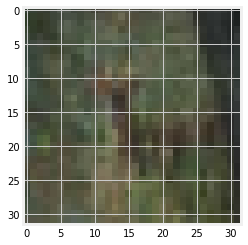

In [22]:
#Show image as picture
img = plt.imshow(x_train[index])

In [23]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [24]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']
#Print the image class
print("The image class is:", classification[y_train[index][0]])

The image class is: deer


In [26]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [27]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [28]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])


The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [29]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [30]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [31]:
#Create models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))



In [33]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])

In [34]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 62s 390ms/step - loss: 2.0446 - accuracy: 0.2271 - val_loss: 1.5128 - val_accuracy: 0.4389
Epoch 2/10
157/157 [==============================] - 62s 395ms/step - loss: 1.4961 - accuracy: 0.4494 - val_loss: 1.3520 - val_accuracy: 0.5107
Epoch 3/10
157/157 [==============================] - 61s 389ms/step - loss: 1.3355 - accuracy: 0.5160 - val_loss: 1.2206 - val_accuracy: 0.5644
Epoch 4/10
157/157 [==============================] - 61s 388ms/step - loss: 1.2063 - accuracy: 0.5640 - val_loss: 1.1603 - val_accuracy: 0.5824
Epoch 5/10
157/157 [==============================] - 61s 386ms/step - loss: 1.1259 - accuracy: 0.5975 - val_loss: 1.1034 - val_accuracy: 0.6138
Epoch 6/10
157/157 [==============================] - 60s 383ms/step - loss: 1.0744 - accuracy: 0.6191 - val_loss: 1.0367 - val_accuracy: 0.6411
Epoch 7/10
157/157 [==============================] - 61s 389ms/step - loss: 1.0043 - accuracy: 0.6429 - val_loss: 1.0110 - val_ac

In [35]:
#Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 0.9369 - accuracy: 0.6701


0.6700999736785889

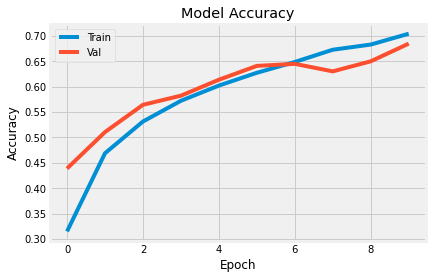

In [37]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

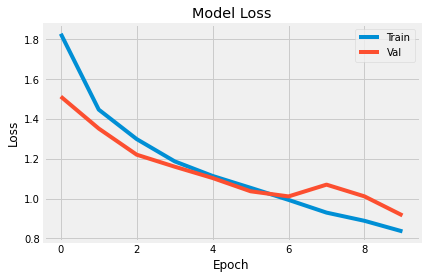

In [38]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [46]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving Cat_jpg.jpg to Cat_jpg.jpg


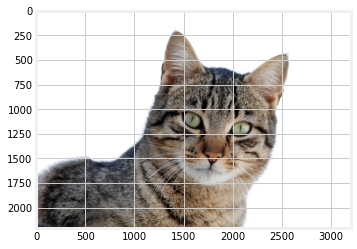

In [48]:
#show the image
new_image = plt.imread('Cat_jpg.jpg')
img = plt.imshow(new_image)

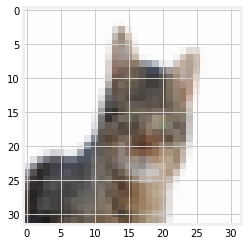

In [49]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [50]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show predictions
predictions

array([[0.02455916, 0.00056338, 0.17261116, 0.5348961 , 0.00697944,
        0.17660967, 0.01629663, 0.02192694, 0.03295506, 0.01260251]],
      dtype=float32)

In [52]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order 
print(list_index)

[3, 5, 2, 8, 0, 7, 6, 9, 4, 1]


In [58]:
#print the most likely class of image
print(classification[list_index[0]])

cat
